In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
df = df.dropna()

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['year'] = df['pickup_datetime'].dt.year
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month

In [36]:
df = df.drop(['key' , 'pickup_datetime' , 'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis = 1)

In [37]:
df.head()

,Unnamed: 0,fare_amount,passenger_count,hour,year,month,day_of_week,distance
0,24238194,7.5,1,19,2015,5,3,1.683323
1,27835199,7.7,1,20,2009,7,4,2.457590
2,44984355,12.9,1,21,2009,8,0,5.036377
3,25894730,5.3,3,8,2009,6,4,1.661683
4,17610152,16.0,5,17,2014,8,3,4.475450


In [40]:
numerical = ['fare_amount' , 'hour' , 'year' , 'month' , 'day_of_week' , 'distance']
matrix = df[numerical].corr()

In [41]:
print(matrix['fare_amount'])

fare_amount    1.000000
hour          -0.021463
year           0.118331
month          0.023813
day_of_week    0.007508
distance       0.024684
Name: fare_amount, dtype: float64


**Remove Outliers**

In [44]:
df = df[df['fare_amount'] > 0]
df = df[df['fare_amount'] < 200]
df = df[df['passenger_count'] > 0]
df = df[df['passenger_count'] < 8]
df = df[df['distance'] > 0]
df = df[df['distance'] < 100]

fare_amount    1.000000
hour          -0.020578
year           0.121490
month          0.024270
day_of_week    0.005513
distance       0.847808
Name: fare_amount, dtype: float64


<Axes: >

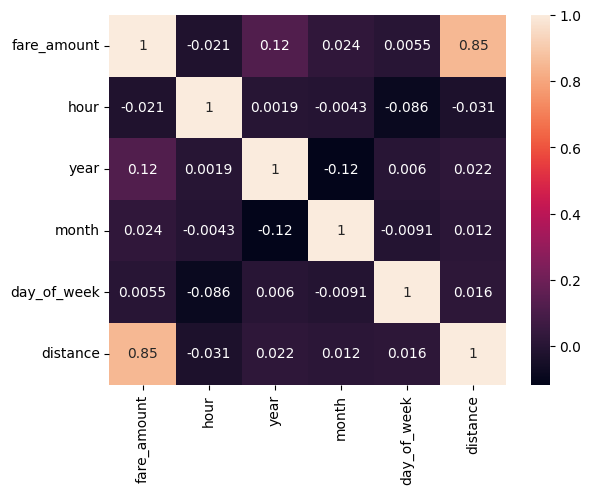

In [51]:
matrix2 = df[numerical].corr()
print(matrix2['fare_amount'])
sns.heatmap(matrix2 , annot = True )

**Train Test Split**

In [52]:
features = ['hour' , 'year' , 'month' , 'day_of_week' , 'distance']
target = 'fare_amount'
X = df[features]
y = df[target]

In [53]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

**Linear Regression**

In [54]:
lin_model = LinearRegression()
lin_model.fit(X_train , y_train)
y_pred = lin_model.predict(X_test)

**Random Forest**

In [55]:
for_model = RandomForestRegressor(random_state = 42, max_depth = 10 , min_samples_leaf = 10)
for_model.fit(X_train,y_train)
y_pred_forest = for_model.predict(X_test)


In [56]:
def eval(model , y_true, y_predict) :
    r2 = r2_score(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    rmse = np.sqrt(mse)

    print(f'R2 error value is {r2 : .2f}')
    print(f'MSE error value is {mse : .2f}')
    print(f'RMSE error value is {rmse : .2f}')


In [57]:
eval("Linear" , y_test, y_pred)

R2 error value is  0.74
MSE error value is  24.26
RMSE error value is  4.93


In [58]:
eval("Random Forest" , y_test, y_pred_forest)

R2 error value is  0.81
MSE error value is  17.05
RMSE error value is  4.13
